In [1]:
import sqlite3

# Create the database
conn = sqlite3.connect("sales_data.db")

# Create a cursor to execute SQL commands
cursor = conn.cursor()

print("Connected to sales_data.db")


Connected to sales_data.db


In [2]:
# Create a sales table with product, quantity, and price columns
cursor.execute(""" 
CREATE TABLE IF NOT EXISTS sales (
    product TEXT, 
    quantity INTEGER, 
    price REAL
)
""")

conn.commit()
print("Table 'sales' created successfully.")

Table 'sales' created successfully.


In [3]:
# Sample sales data to insert into the table
sales_data = [
    ("Pen", 20, 5.0),
    ("Notebook", 10, 15.0),
    ("Pencil", 30, 2.0),
    ("Eraser", 15, 3.0),
    ("Marker", 12, 7.0),
    ("Pen", 18, 5.0),
    ("Notebook", 8, 15.0)
]

# Insert data into the sales table
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sales_data)
conn.commit()

print("Sample sales data inserted successfully.")

Sample sales data inserted successfully.


In [4]:
import pandas as pd

# SQL query to calculate total quantity and revenue by product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""

# Load query result into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the DataFrame
print(df)

    product  total_quantity  total_revenue
0    Eraser              30           90.0
1    Marker              24          168.0
2  Notebook              36          540.0
3       Pen              76          380.0
4    Pencil              60          120.0


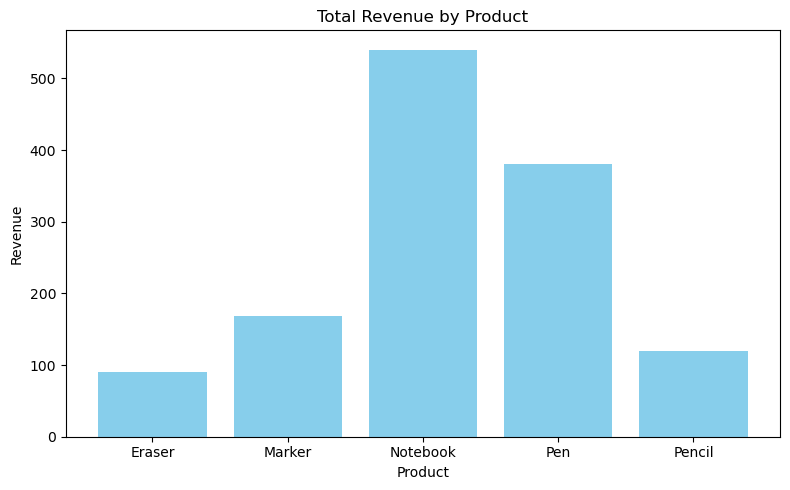

In [5]:
import matplotlib.pyplot as plt

#Plot revenue by product as a bar chart 
plt.figure(figsize=(8, 5))
plt.bar(df['product'], df['total_revenue'], color='skyblue')
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()